In [4]:
# 依存関係インストール
from PIL import Image
from IPython.display import display
import random
import json
import os

In [10]:

########################################
# 特性の希少性を割当
########################################
face = ["White", "Black"]
face_weights = [60, 40]

ears = ["No Earring", "Left Earring", "Right Earring", "Two Earrings"]
ears_weights = [25, 30, 44, 1]

eyes = ["Regular", "Small", "Rayban", "Hipster", "Focused"]
eyes_weights = [70, 10, 5 , 1 , 14]

hair = ['Up Hair', 'Down Hair', 'Mohawk', 'Red Mohawk', 'Orange Hair', 'Bubble Hair', 'Emo Hair',
 'Thin Hair',
 'Bald',
 'Blonde Hair',
 'Caret Hair',
 'Pony Tails']
hair_weights = [10 , 10 , 10 , 10 ,10, 10, 10 ,10 ,10, 7 , 1 , 2]

mouth = ['Black Lipstick', 'Red Lipstick', 'Big Smile', 'Smile', 'Teeth Smile', 'Purple Lipstick']
mouth_weights = [10, 10,50, 10,15, 5]

nose = ['Nose', 'Nose Ring']
nose_weights = [90, 10]


########################################
# 特徴分類
########################################

face_files = {
    "White": "face1",
    "Black": "face2"
}

ears_files = {
    "No Earring": "ears1",
    "Left Earring": "ears2",
    "Right Earring": "ears3",
    "Two Earrings": "ears4"
}

eyes_files = {
    "Regular": "eyes1",
    "Small": "eyes2",
    "Rayban": "eyes3",
    "Hipster": "eyes4",
    "Focused": "eyes5"
}

hair_files = {
    "Up Hair": "hair1",
    "Down Hair": "hair2",
    "Mohawk": "hair3",
    "Red Mohawk": "hair4",
    "Orange Hair": "hair5",
    "Bubble Hair": "hair6",
    "Emo Hair": "hair7",
    "Thin Hair": "hair8",
    "Bald": "hair9",
    "Blonde Hair": "hair10",
    "Caret Hair": "hair11",
    "Pony Tails": "hair12"
}


mouth_files = {
    "Black Lipstick": "m1",
    "Red Lipstick": "m2",
    "Big Smile": "m3",
    "Smile": "m4",
    "Teeth Smile": "m5",
    "Purple Lipstick": "m6"
}

nose_files = {
    "Nose": "n1",
    "Nose Ring": "n2"
}




################################
# 画像の特性を定義
################################
TOTAL_IMAGES = 1000

all_images = []

# A recursive function to generate unique image combinations
def create_new_image():

    new_image = {} #

    # For each trait category, select a random trait based on the weightings
    new_image ["Face"] = random.choices(face, face_weights)[0]
    new_image ["Ears"] = random.choices(ears, ears_weights)[0]
    new_image ["Eyes"] = random.choices(eyes, eyes_weights)[0]
    new_image ["Hair"] = random.choices(hair, hair_weights)[0]
    new_image ["Mouth"] = random.choices(mouth, mouth_weights)[0]
    new_image ["Nose"] = random.choices(nose, nose_weights)[0]

    if new_image in all_images:
        return create_new_image()
    else:
        return new_image


# Generate the unique combinations based on trait weightings
for i in range(TOTAL_IMAGES):

    new_trait_image = create_new_image()

    all_images.append(new_trait_image)


###############################
# 一意性を検証
###############################
def all_images_unique(all_images):
    seen = list()
    return not any(i in seen or seen.append(i) for i in all_images)

print("Are all images unique?", all_images_unique(all_images))
# Add token Id to each image
i = 0
for item in all_images:
    item["tokenId"] = i
    i = i + 1

print(all_images)


###############################
# 特性カウント
###############################
face_count = {}
for item in face:
    face_count[item] = 0

ears_count = {}
for item in ears:
    ears_count[item] = 0

eyes_count = {}
for item in eyes:
    eyes_count[item] = 0

hair_count = {}
for item in hair:
    hair_count[item] = 0

mouth_count = {}
for item in mouth:
    mouth_count[item] = 0

nose_count = {}
for item in nose:
    nose_count[item] = 0

for image in all_images:
    face_count[image["Face"]] += 1
    ears_count[image["Ears"]] += 1
    eyes_count[image["Eyes"]] += 1
    hair_count[image["Hair"]] += 1
    mouth_count[image["Mouth"]] += 1
    nose_count[image["Nose"]] += 1

print(face_count)
print(ears_count)
print(eyes_count)
print(hair_count)
print(mouth_count)
print(nose_count)



Are all images unique? True
[{'Face': 'White', 'Ears': 'Right Earring', 'Eyes': 'Regular', 'Hair': 'Thin Hair', 'Mouth': 'Black Lipstick', 'Nose': 'Nose', 'tokenId': 0}, {'Face': 'Black', 'Ears': 'Left Earring', 'Eyes': 'Small', 'Hair': 'Emo Hair', 'Mouth': 'Big Smile', 'Nose': 'Nose Ring', 'tokenId': 1}, {'Face': 'White', 'Ears': 'Left Earring', 'Eyes': 'Regular', 'Hair': 'Orange Hair', 'Mouth': 'Big Smile', 'Nose': 'Nose', 'tokenId': 2}, {'Face': 'Black', 'Ears': 'No Earring', 'Eyes': 'Focused', 'Hair': 'Red Mohawk', 'Mouth': 'Big Smile', 'Nose': 'Nose', 'tokenId': 3}, {'Face': 'White', 'Ears': 'Right Earring', 'Eyes': 'Regular', 'Hair': 'Mohawk', 'Mouth': 'Teeth Smile', 'Nose': 'Nose', 'tokenId': 4}, {'Face': 'White', 'Ears': 'Right Earring', 'Eyes': 'Regular', 'Hair': 'Bald', 'Mouth': 'Big Smile', 'Nose': 'Nose Ring', 'tokenId': 5}, {'Face': 'Black', 'Ears': 'No Earring', 'Eyes': 'Regular', 'Hair': 'Down Hair', 'Mouth': 'Big Smile', 'Nose': 'Nose', 'tokenId': 6}, {'Face': 'White', 

In [4]:
###############################
# 格納用フォルダ生成
###############################
generate_Images_folder = './drive/MyDrive/06_NFT/images'
parts_folder = './drive/MyDrive/06_NFT/scripts'

os.mkdir(f'{generate_Images_folder}')

In [11]:
###############################
# 画像生成
###############################

for item in all_images:

    im1 = Image.open(f'{parts_folder}/face_parts/face/{face_files[item["Face"]]}.png').convert('RGBA')
    im2 = Image.open(f'{parts_folder}/face_parts/eyes/{eyes_files[item["Eyes"]]}.png').convert('RGBA')
    im3 = Image.open(f'{parts_folder}/face_parts/ears/{ears_files[item["Ears"]]}.png').convert('RGBA')
    im4 = Image.open(f'{parts_folder}/face_parts/hair/{hair_files[item["Hair"]]}.png').convert('RGBA')
    im5 = Image.open(f'{parts_folder}/face_parts/mouth/{mouth_files[item["Mouth"]]}.png').convert('RGBA')
    im6 = Image.open(f'{parts_folder}/face_parts/nose/{nose_files[item["Nose"]]}.png').convert('RGBA')

    #Create each composite
    com1 = Image.alpha_composite(im1, im2)
    com2 = Image.alpha_composite(com1, im3)
    com3 = Image.alpha_composite(com2, im4)
    com4 = Image.alpha_composite(com3, im5)
    com5 = Image.alpha_composite(com4, im6)

    #Convert to RGB
    rgb_im = com5.convert('RGB')
    file_name = str(item["tokenId"]) + ".png"
    rgb_im.save(generate_Images_folder + '/' + file_name)


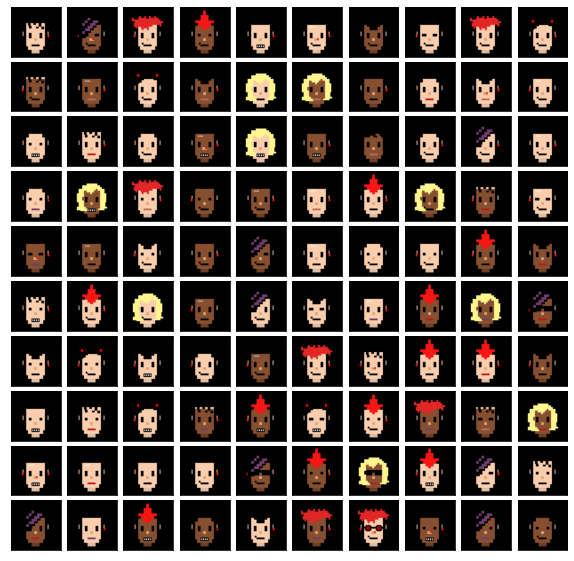

In [11]:
###############################
# 画像一覧表示
###############################
import cv2
import glob
import numpy as np
from PIL import Image
from natsort import natsorted
from matplotlib import pyplot as plt

# タイル状に pm × pm 枚配置
pm = 10

#画像の読み込み
generate_Images_folder = './drive/MyDrive/06_NFT/images'
im = Image.open(generate_Images_folder + "/0.png")

# 所定のフォルダ内にあるjpgファイルを連続で読み込んでリスト化する
files = glob.glob(generate_Images_folder + "/*.png")

# 空の入れ物（リスト）を準備
d = []
# 自然順（ファイル番号の小さい順）に1枚づつ読み込まれる
for i in natsorted(files):
    img = Image.open(i)
    img = np.asarray(img)
    d.append(img)

# タイル状に画像を一覧表示
fig, ax = plt.subplots(pm, pm, figsize=(10, 10))
# 画像ごとにスペースを設ける
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(pm):
    for j in range(pm):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(d[pm*i+j], cmap="bone")
plt.show()
